In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
data = pd.read_csv("/content/drive/MyDrive/ml-1m/ratings.dat", sep="::",  header = None,names= ["userId", 'movieId', 'ratings', 'timestamp'])

<ipython-input-2-c6e7a942bdc5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("/content/drive/MyDrive/ml-1m/ratings.dat", sep="::",  header = None,names= ["userId", 'movieId', 'ratings', 'timestamp'])


In [3]:
data

,userId,movieId,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
features_path = '/content/drive/MyDrive/FYP/reduced_features_vgg16.pickle'

In [5]:
with open(features_path, 'rb') as file:
    features = pickle.load(file)

In [6]:
poster_features_df = pd.DataFrame(list(features.items()), columns=['movieId', 'poster_feature'])

In [7]:
poster_features_df['poster_feature']

0       [-631.20751953125, 2171.90087890625, -485.4083...
1       [3718.248046875, 383.656494140625, 916.2111816...
2       [182.28121948242188, -2418.23486328125, 1008.1...
3       [-1270.514892578125, -568.142822265625, -141.8...
4       [439.02423095703125, -895.1201171875, -80.4989...
                              ...                        
3811    [1364.3526611328125, -608.7848510742188, 777.3...
3812    [930.9751586914062, 2196.090576171875, -1277.7...
3813    [1343.83642578125, -14.392576217651367, -654.2...
3814    [2104.60546875, -256.8797302246094, 1473.47534...
3815    [1165.253173828125, 988.3091430664062, 735.681...
Name: poster_feature, Length: 3816, dtype: object

In [8]:
poster_features_df['movieId'] = poster_features_df['movieId'].str.replace('.jpg', '')

<ipython-input-8-a2d707a2d164>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  poster_features_df['movieId'] = poster_features_df['movieId'].str.replace('.jpg', '')


In [9]:
poster_features_df['movieId'] = pd.to_numeric(poster_features_df['movieId'], errors='coerce')

In [10]:
merged_df = pd.merge(data, poster_features_df, on='movieId', how='inner')

In [11]:
merged_df

,userId,movieId,ratings,timestamp,poster_feature
0,1,1193,5,978300760,"[1018.383056640625, -1130.800537109375, -988.9..."
1,2,1193,5,978298413,"[1018.383056640625, -1130.800537109375, -988.9..."
2,12,1193,4,978220179,"[1018.383056640625, -1130.800537109375, -988.9..."
3,15,1193,4,978199279,"[1018.383056640625, -1130.800537109375, -988.9..."
4,17,1193,5,978158471,"[1018.383056640625, -1130.800537109375, -988.9..."
...,...,...,...,...,...
997808,5949,2198,5,958846401,"[-872.3152465820312, 898.4654541015625, 381.76..."
997809,5675,2703,3,976029116,"[-256.4447021484375, -1146.069580078125, -233...."
997810,5780,2845,1,958153068,"[739.4730224609375, -1262.7808837890625, -926...."
997811,5851,3607,5,957756608,"[120.9454116821289, -687.6786499023438, 3727.1..."


In [12]:
poster_feature_columns = ['feature_' + str(i) for i in range(len(merged_df['poster_feature'][0]))]
merged_df[poster_feature_columns] = pd.DataFrame(merged_df['poster_feature'].tolist(), index=merged_df.index)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
merged_df

,userId,movieId,ratings,timestamp,poster_feature,feature_0,feature_1,feature_2,feature_3,feature_4,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,1,1193,5,978300760,"[1018.383056640625, -1130.800537109375, -988.9...",1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
1,2,1193,5,978298413,"[1018.383056640625, -1130.800537109375, -988.9...",1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
2,12,1193,4,978220179,"[1018.383056640625, -1130.800537109375, -988.9...",1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
3,15,1193,4,978199279,"[1018.383056640625, -1130.800537109375, -988.9...",1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
4,17,1193,5,978158471,"[1018.383056640625, -1130.800537109375, -988.9...",1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997808,5949,2198,5,958846401,"[-872.3152465820312, 898.4654541015625, 381.76...",-872.315247,898.465454,381.768005,-769.193176,208.711853,...,448.393829,595.548462,654.175171,-361.089111,-329.333588,702.336304,93.285538,712.900085,-378.171021,-382.218414
997809,5675,2703,3,976029116,"[-256.4447021484375, -1146.069580078125, -233....",-256.444702,-1146.069580,-233.185287,-910.018372,12.945736,...,-930.309937,206.117416,46.500347,-1129.738647,28.882309,-603.844971,6.024245,-143.136551,-478.585785,226.394516
997810,5780,2845,1,958153068,"[739.4730224609375, -1262.7808837890625, -926....",739.473022,-1262.780884,-926.085693,211.095978,-51.045372,...,-512.652283,-240.292206,45.013268,-165.321503,96.932869,70.054527,95.700455,260.993073,-160.906906,-120.827766
997811,5851,3607,5,957756608,"[120.9454116821289, -687.6786499023438, 3727.1...",120.945412,-687.678650,3727.197754,9.815442,1013.451721,...,-832.970947,-178.239044,-857.091064,221.711929,229.280975,363.186005,517.537170,105.309303,667.730286,236.266144


In [15]:
merged_df= merged_df.drop(['poster_feature', 'timestamp'], axis = 1)

In [17]:
X = merged_df[['userId', 'movieId', 'feature_0', 'feature_1', 'feature_2']]
y = merged_df['ratings']

In [18]:
merged_df.describe()

,userId,movieId,ratings,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
count,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,...,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000,997813.000000
mean,3024.281102,1865.784615,3.581082,17.592894,87.334523,-166.797774,-12.850748,-146.434092,63.213258,-9.560024,...,19.363997,31.950228,1.105567,6.431586,-15.490237,-30.403753,-10.205016,20.375894,20.874261,-23.876014
std,1728.435416,1096.554323,1.117071,1306.632107,1260.279123,1006.021814,955.334702,794.817166,773.507321,715.313846,...,468.953125,437.083484,432.216825,424.670999,421.802828,412.641994,422.028394,437.478276,406.160995,384.457495
min,1.000000,1.000000,1.000000,-2758.137695,-3272.813965,-2120.309570,-2762.850830,-2520.624268,-2611.231689,-2519.647461,...,-1837.070923,-1610.436768,-1695.694458,-1733.275269,-1633.062134,-1802.325195,-1631.284912,-1509.869263,-1642.055420,-1410.217773
25%,1505.000000,1029.000000,3.000000,-968.330505,-778.370483,-896.048340,-676.614685,-684.265442,-459.045959,-509.033600,...,-274.462524,-252.656265,-278.143219,-275.210144,-289.033020,-290.401794,-268.233246,-267.835266,-227.538467,-279.050568
50%,3069.000000,1840.000000,4.000000,-226.299896,-185.893143,-350.596985,-45.101154,-234.247803,23.430605,22.985453,...,28.858816,4.868063,-11.117262,2.993963,-31.152760,-17.904243,0.688778,-7.232389,13.625533,-6.719328
75%,4476.000000,2770.000000,4.000000,738.469666,703.539246,366.733978,591.135254,313.811401,563.437622,464.048065,...,304.438599,316.526917,266.389069,280.556458,227.302231,241.269073,248.431366,284.883118,270.427094,239.521118
max,6040.000000,3952.000000,5.000000,6502.427246,5448.549316,4954.095703,4279.151367,3556.385986,3585.572754,2902.596924,...,2213.670410,1908.076050,2003.341675,1746.357544,1810.035156,1832.955078,1836.680176,1970.692017,1660.802979,1795.633301


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
rmse = mean_squared_error(y_pred, y_test, squared = False)

In [24]:
rmse

1.1136508342778018

In [25]:
merged_df

,userId,movieId,ratings,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,1,1193,5,1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,749.922668,124.629608,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
1,2,1193,5,1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,749.922668,124.629608,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
2,12,1193,4,1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,749.922668,124.629608,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
3,15,1193,4,1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,749.922668,124.629608,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
4,17,1193,5,1018.383057,-1130.800537,-988.930237,782.119385,1049.217407,749.922668,124.629608,...,-200.132492,-182.314499,156.171844,-273.033844,-251.239273,210.249359,-346.445282,1038.580078,-25.514698,-870.935852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997808,5949,2198,5,-872.315247,898.465454,381.768005,-769.193176,208.711853,864.186768,-980.861511,...,448.393829,595.548462,654.175171,-361.089111,-329.333588,702.336304,93.285538,712.900085,-378.171021,-382.218414
997809,5675,2703,3,-256.444702,-1146.069580,-233.185287,-910.018372,12.945736,-404.790558,-1083.803711,...,-930.309937,206.117416,46.500347,-1129.738647,28.882309,-603.844971,6.024245,-143.136551,-478.585785,226.394516
997810,5780,2845,1,739.473022,-1262.780884,-926.085693,211.095978,-51.045372,-233.191498,-510.720367,...,-512.652283,-240.292206,45.013268,-165.321503,96.932869,70.054527,95.700455,260.993073,-160.906906,-120.827766
997811,5851,3607,5,120.945412,-687.678650,3727.197754,9.815442,1013.451721,-316.953522,6.616349,...,-832.970947,-178.239044,-857.091064,221.711929,229.280975,363.186005,517.537170,105.309303,667.730286,236.266144


In [ ]:
#merged_df.to_csv("/content/drive/MyDrive/FYP/updated_dataset-1m.csv")

In [26]:
# Assuming 'merged_df' is your DataFrame with original and improved predictions
improved_predictions = pd.DataFrame({
    'userId': X_test['userId'],
    'movieId': X_test['movieId'],
    'Actual_rating': y_test,
    'Prediction by Hybrid Model': model.predict(X_test),
})

In [43]:
improved_predictions[improved_predictions['userId'] == 774]

,userId,movieId,Actual_rating,Prediction by XGBoost Model
89635,774,3147,3,3.992430
4416,774,2355,3,3.688975
914169,774,3317,4,3.860744
575241,774,3785,3,2.920846
451256,774,317,2,3.046389
411879,774,1584,3,3.631839
602450,774,1608,3,3.490582
339476,774,266,2,3.316294
598522,774,832,3,3.332541
38217,774,2762,4,4.332391


## XGBoost

In [28]:
pip install xgboost

In [29]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [30]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

In [31]:
model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtest, 'eval')], early_stopping_rounds=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:02:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-rmse:1.11045
[1]	eval-rmse:1.10487
[2]	eval-rmse:1.09944
[3]	eval-rmse:1.09466
[4]	eval-rmse:1.09093
[5]	eval-rmse:1.08732
[6]	eval-rmse:1.08527
[7]	eval-rmse:1.08372
[8]	eval-rmse:1.08069
[9]	eval-rmse:1.07754
[10]	eval-rmse:1.07628
[11]	eval-rmse:1.07511
[12]	eval-rmse:1.07251
[13]	eval-rmse:1.07053
[14]	eval-rmse:1.06859
[15]	eval-rmse:1.06690
[16]	eval-rmse:1.06631
[17]	eval-rmse:1.06486
[18]	eval-rmse:1.06353
[19]	eval-rmse:1.06247
[20]	eval-rmse:1.06131
[21]	eval-rmse:1.06015
[22]	eval-rmse:1.05963
[23]	eval-rmse:1.05815
[24]	eval-rmse:1.05722
[25]	eval-rmse:1.05606
[26]	eval-rmse:1.05504
[27]	eval-rmse:1.05400
[28]	eval-rmse:1.05344
[29]	eval-rmse:1.05302
[30]	eval-rmse:1.05256
[31]	eval-rmse:1.05196
[32]	eval-rmse:1.05152
[33]	eval-rmse:1.05029
[34]	eval-rmse:1.04934
[35]	eval-rmse:1.04894
[36]	eval-rmse:1.04835
[37]	eval-rmse:1.04787
[38]	eval-rmse:1.04733
[39]	eval-rmse:1.04640
[40]	eval-rmse:1.04587
[41]	eval-rmse:1.04545
[42]	eval-rmse:1.04438
[43]	eval-rmse:1.0441

In [32]:
predictions = model.predict(dtest)

In [33]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.9743800922415323


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

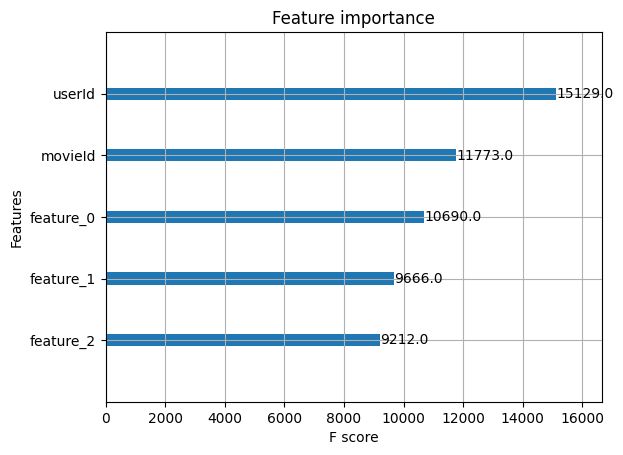

In [34]:
xgb.plot_importance(model)

In [35]:
improved_predictions = pd.DataFrame({
    'userId': X_test['userId'],
    'movieId': X_test['movieId'],
    'Actual_rating': y_test,
    'Prediction by XGBoost Model': predictions,
})

In [36]:
improved_predictions

,userId,movieId,Actual_rating,Prediction by XGBoost Model
619447,4884,2701,1,2.205605
757543,5684,2915,4,3.498273
402502,4088,1060,5,4.057233
677336,4572,2953,5,2.451513
89635,774,3147,3,3.992430
...,...,...,...,...
244711,3892,1617,5,4.192924
332506,204,1569,4,3.341784
806531,333,1937,3,3.544856
299793,1017,3409,4,3.198828
